## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

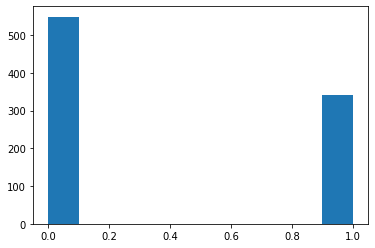

In [3]:
plt.hist(data.Survived)

First, check for missing data and remove all columns containing missing data

In [4]:
# Calculate NA values per column
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
data.drop(['Age', 'Cabin', 'Embarked'], axis=1, inplace=True)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [7]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [8]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Fare' has 248 unique values


In [9]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data.drop(['PassengerId'], axis=1, inplace=True)

To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [10]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
data_ = pd.get_dummies(data)

In [12]:
# Let's check the new columns
data_.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,1,0,7.2500,0,1
1,1,1,1,0,71.2833,1,0
2,1,3,0,0,7.9250,1,0
3,1,1,1,0,53.1000,1,0
4,0,3,0,0,8.0500,0,1


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [13]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X = data_.drop('Survived', axis=1)
Y = data_.Survived

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
knn.score(X_train, y_train)

0.9002808988764045

In [15]:
knn.score(X_test, y_test)

0.7541899441340782

Would you say the model overfits? Why or why not? Put your answer in the comment below.

*The model above is somewhat overfitting due to the large variance between the train and test scores caused by the k being 1. That said, it is not doing that well for unseen data.*

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [27]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [28]:
# answer below:
for val in k_list:
    print(f'Current: {val}')
    knn_ = KNeighborsClassifier(n_neighbors=val)
    knn_.fit(X_train, y_train)
    
    train_pred = knn_.predict(X_train)
    test_pred = knn_.predict(X_test)
    
    print(f'Train score: {accuracy_score(y_train, train_pred)}')
    accuracy_train.append(accuracy_score(y_train, train_pred))
    print(f'Test score: {accuracy_score(y_test, test_pred)}')
    accuracy_test.append(accuracy_score(y_test, test_pred))
    print(f'Train f1: {f1_score(y_train, train_pred)}')
    f1_train.append(f1_score(y_train, train_pred))
    print(f'Test f1: {f1_score(y_test, test_pred)}\n')
    f1_test.append(f1_score(y_test, test_pred))

Current: 1
Train score: 0.9002808988764045
Test score: 0.7541899441340782
Train f1: 0.872072072072072
Test f1: 0.6716417910447761

Current: 3
Train score: 0.8567415730337079
Test score: 0.7821229050279329
Train f1: 0.8191489361702128
Test f1: 0.6976744186046512

Current: 5
Train score: 0.8441011235955056
Test score: 0.7597765363128491
Train f1: 0.7970749542961609
Test f1: 0.6717557251908397

Current: 7
Train score: 0.8174157303370787
Test score: 0.7821229050279329
Train f1: 0.7636363636363638
Test f1: 0.7111111111111111

Current: 9
Train score: 0.8089887640449438
Test score: 0.776536312849162
Train f1: 0.7509157509157509
Test f1: 0.696969696969697

Current: 11
Train score: 0.7963483146067416
Test score: 0.7597765363128491
Train f1: 0.732965009208103
Test f1: 0.6666666666666666

Current: 13
Train score: 0.776685393258427
Test score: 0.7597765363128491
Train f1: 0.7124773960216997
Test f1: 0.6717557251908397



In [32]:
print(accuracy_train)

[0.9002808988764045, 0.8567415730337079, 0.8441011235955056, 0.8174157303370787, 0.8089887640449438, 0.7963483146067416, 0.776685393258427]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

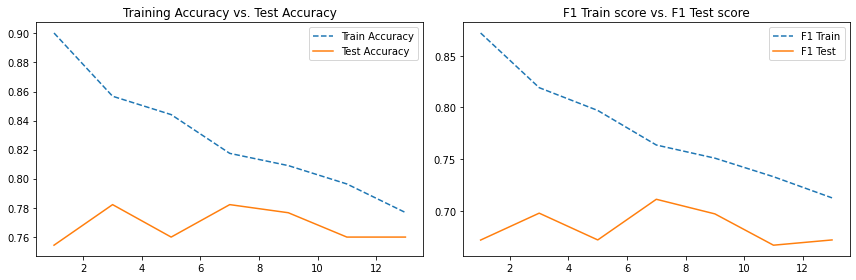

In [42]:
# answer below:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Training Accuracy vs. Test Accuracy')
plt.plot(k_list, accuracy_train, marker='', linestyle='dashed', label='Train Accuracy')
plt.plot(k_list, accuracy_test, label='Test Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('F1 Train score vs. F1 Test score')
plt.plot(k_list, f1_train, marker='', linestyle='dashed', label='F1 Train')
plt.plot(k_list, f1_test, label='F1 Test')
plt.legend()

plt.tight_layout()
plt.show()

Please comment the results of the plots above

*In both plots, some convergence can be found if k is set to 7, making it the ideal k value for this KNN model. While going further than 12 might result to closer values, the accuracy and F1 scores also drop due to possible underfitting.*